![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 001 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 0.1.000 | 12/03/2023 | Royi Avital | First version                                                      |
|         |            |             |                                                                    |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_03/Exercise0001Part002.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import time

# Machine Learning

# Miscellaneous
import os
import math
from platform import python_version
import random
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [2]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

DATA_FILE_URL   = r'https://drive.google.com/uc?export=download&confirm=9iBg&id=1ZmoK4qFlXs142kLBJeHSKig7DOKEnLIX'
DATA_FILE_NAME  = r'ImgData.mat'


## Guidelines

 - Fill the full names of the team memebers in the `Team Members` section.
 - Answer all questions within the Jupyter Notebook.
 - Open questions are in part I of the exercise.
 - Coding based questions are in the subsequent notebooks.
 - Use MarkDown + MathJaX + Code to answer.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for question.
 - Good Luck!

## Team Members

 - `<FULL>_<NAME>_<001>`.
 - `<FULL>_<NAME>_<002>`.

## 4. Descent Methods

### Gradient Descent

Let $\boldsymbol{Y} \in \mathbb{R}^{d \times d}$ be a blurred version of the image $\boldsymbol{X} \in \mathbb{R}^{d \times d}$:

$$ \boldsymbol{Y} = \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} $$

Where $\boldsymbol{H} \in\mathbb{R}^{d \times d}$ is a known separable blurring matrix.

The goal is to find $\boldsymbol{X}$ that minimizes:

$$\boldsymbol{X}^{\star} = \arg \min_{\boldsymbol{X}} f \left( \boldsymbol{X} \right) = \arg \min_{\boldsymbol{X}} {\left\| \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} - \boldsymbol{Y} \right\|}_{F}^{2}$$

## Generate / Load Data

Load the data: $\boldsymbol{Y}$ and $\boldsymbol{H}$.

In [4]:
# Download Data
# This section downloads data from the given URL if needed.

if not os.path.exists(DATA_FILE_NAME):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

In [5]:
dData = sp.io.loadmat(DATA_FILE_NAME)
mY    = dData['Y']
mH    = dData['H']

print(f'The image dimensions are: {mY.shape}')
print(f'The filter matrix dimensions are: {mH.shape}')

The image dimensions are: (256, 256)
The filter matrix dimensions are: (256, 256)


### Plot the Data

This sections illustrates the data.

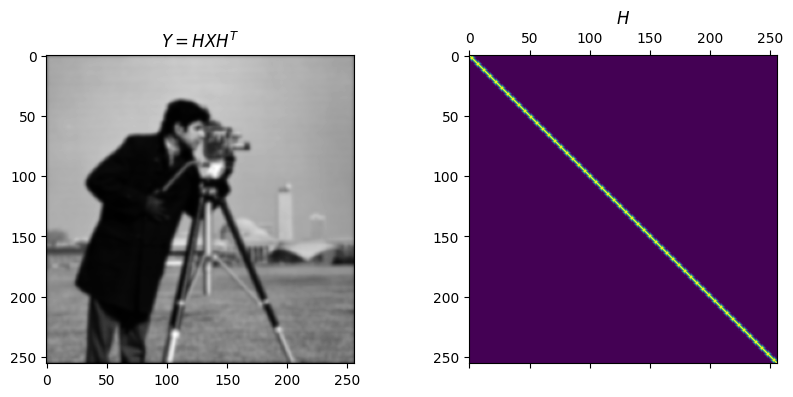

In [6]:
hF, hAs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
hAs = hAs.flat

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].matshow(mH)
hAs[1].set_title('$H$')

plt.show()

### 4.1. Question

Find a closed form expression for $\boldsymbol{X}^{\star}$ as a function of $\boldsymbol{Y}$ and $\boldsymbol{H}$.


### 4.1. Solution
Let $f(X) = ||HX^{\star}H^{T}-Y||^{2}_{F} = g_2(g_1(X))$ 

where:

$g_1(X) = HX^{\star}H^{T}-Y$   

$g_2(X) = ||X||^2_F$

and:

$\nabla g_1(X)[H^{'}] = HH^{'}H^{T}$   

$\nabla g_2(X) = 2X$

then:

$ \nabla f(X)[H^{'}]= \ <\nabla g_2(g_1(X)), \nabla(g_1(X)[H^{'}]> \ =  \\
<2H^{T}(HXH^{T}-Y)H, H^{'}>$

$f$ is minimized when:

$2H^{T}(HXH^{T}-Y)H = 0$

Therfore:

${X}^{\star} = {H}^{-1} {Y}({H}^{-1})^{T}$


### 4.2. Task

Compute $\boldsymbol{X}^{\star}$ and plot it.

**Tip**: Avoid inverting the same matrix twice!

In [7]:
#===========================Fill This===========================#
# 1. Compute the optimal `mX` using the derivation.
# !! You may use `np.linalg.inv()` or better `np.linalg.solve()` or np.linalg.lstsq().
mX = np.linalg.solve(mH, np.dot(mY, np.transpose(np.linalg.inv(mH))))
#===============================================================#

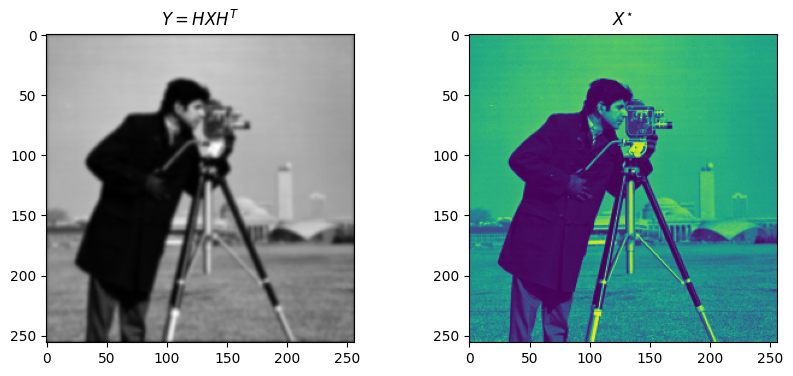

In [8]:
# Plot the Estimated Image

hF, hAs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
hAs = hAs.flat

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].imshow(mX)
hAs[1].set_title('$X^{\star}$')


plt.show()

## Iterative Solution

In practice, for many real world problems, the direct solution can not be computed due to the inversion of a matrix.  
In such cases, the model is given by a sparse matrix and the solution is calculated by using only _matrix vector operations_ (Also called _MatVec_, namely matrix vector multiplication).  

In this section we'll implement such method based on the Gradient Descent.

Given the function:

$$ f \left( \boldsymbol{X} \right) = {\left\| \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} - \boldsymbol{Y} \right\|}_{F}^{2} $$

### 4.3. Task

Implement the following functions:

```python
#==================================================#
def ObjF(mX):
#==================================================#
def GradF(mX):
#==================================================#
def ApplyGradientDescent(objF, gradF, mX0, μ, numIter, ε):
#==================================================#
```



In [9]:
#===========================Fill This===========================#
# 1. Implement the objective function.
# !! You may use `np.linalg.norm()` or the element wise definition of the Frobenius norm (See `np.linalg.inner()`).
def ObjF(mX: np.ndarray) -> float:
    '''
    f(X) = ||HXH^T - Y||_F^2 is the objective function
    '''
    return np.linalg.norm(np.dot(np.dot(mH, mX), np.transpose(mH)) - mY, 'fro') ** 2
#===============================================================#

In [10]:
#===========================Fill This===========================#
# 1. Implement the gradient of the objective function.
def GradF(mX: np.ndarray) -> np.ndarray:
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    HT = np.transpose(mH)
    return 2*np.dot(np.dot(HT, np.dot(np.dot(mH, mX), HT) - mY), mH)
#===============================================================#

In [11]:
from re import U
#===========================Fill This===========================#
# 1. Implement the gradient descent optimizer function.
def ApplyGradientDescent(objF: Callable, gradF: Callable, mX0: np.ndarray, μ: float, numIter: int, ε: float) -> Tuple[np.ndarray, List]:
    '''
    Apply gradient descent.
    Args:
        objF    - Objective function (Callable).
        gradF   - Objective gradient function (Callable).
        mX0     - Initial point (Array).
        μ       - Step size / Learning rate (Float).
        numIter - Maximum number of iterations (Integer).
        ε       - Stopping criterion value (Float).
    Output:
        mX      - The converged mX (Array).
        lF      - The value objective for each iteration (List).
    Stopping criterion:
        - Stop iterate when ||∇f(X)||_F < (numPixels * ε).
        - Stop iterate after `numIter` iterations.
    '''
    ub = mX0.shape[0] * mX0.shape[1] * ε
    mX = mX0
    lF = []
    for k in range(numIter):
        grad = gradF(mX)
        mX = mX - μ * grad
        lF.append(objF(mX))
        if np.linalg.norm(grad, 'fro') < ub:
          return mX, lF, k
    return mX, lF, k
#===============================================================#

### 4.3. Task

 - Set a reasonable initial point for `mX0`.
 - Set the parameter `μ`.
 - Set the parameter `numIter`.
 - Set the parameter `ε`.

In [12]:
#===========================Fill This===========================#
mX0     = np.zeros(mX.shape)
μ       = 0.9
numIterGD = 1000
ε       = 10e-12
#===============================================================#

### 4.4. Task

In the following section we'll use the function `ApplyGradientDescent()` to estimate the image `mX`.  

 - Optimize the parameters above to get a comparable result as fast as you can.
 - Time the run time of the function and the number of iterations required.

μ: 0.1, numIter: 100 - run time: 1.16192626953125 sec, actual number of iterations: 100
μ: 0.3, numIter: 100 - run time: 0.5557832717895508 sec, actual number of iterations: 100
μ: 0.5, numIter: 100 - run time: 0.9679808616638184 sec, actual number of iterations: 100
μ: 0.7, numIter: 100 - run time: 1.0135929584503174 sec, actual number of iterations: 100
μ: 0.9, numIter: 100 - run time: 0.7048392295837402 sec, actual number of iterations: 100


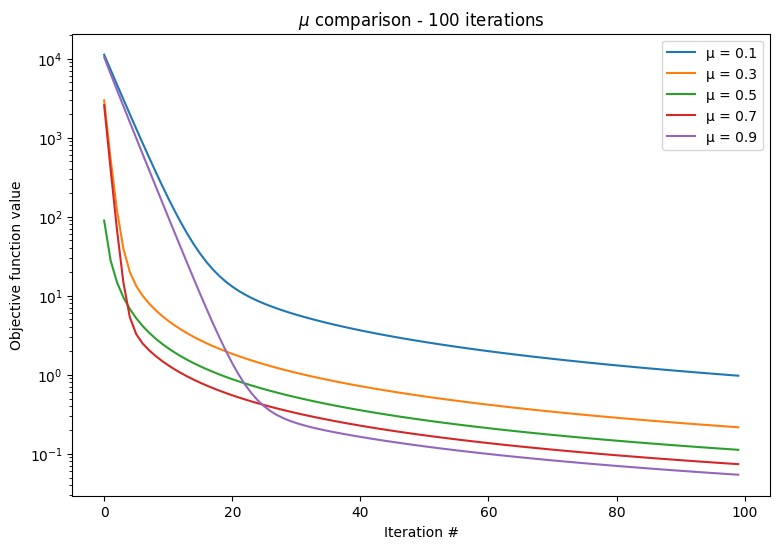

μ: 0.1, numIter: 500 - run time: 4.037735939025879 sec, actual number of iterations: 500
μ: 0.3, numIter: 500 - run time: 2.54278826713562 sec, actual number of iterations: 500
μ: 0.5, numIter: 500 - run time: 2.7418439388275146 sec, actual number of iterations: 500
μ: 0.7, numIter: 500 - run time: 2.5922727584838867 sec, actual number of iterations: 500
μ: 0.9, numIter: 500 - run time: 3.014596700668335 sec, actual number of iterations: 500


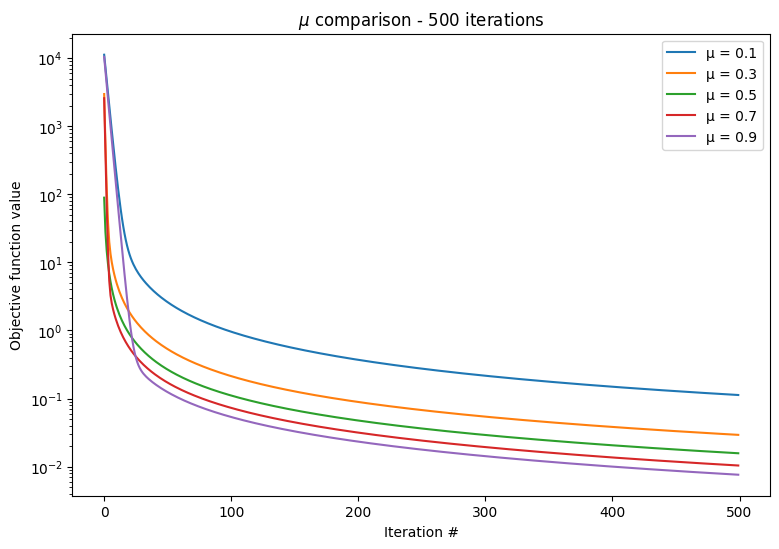

μ: 0.1, numIter: 1000 - run time: 5.7271318435668945 sec, actual number of iterations: 1000
μ: 0.3, numIter: 1000 - run time: 4.967059850692749 sec, actual number of iterations: 1000
μ: 0.5, numIter: 1000 - run time: 4.8583598136901855 sec, actual number of iterations: 1000
μ: 0.7, numIter: 1000 - run time: 5.050682306289673 sec, actual number of iterations: 1000
μ: 0.9, numIter: 1000 - run time: 4.955355167388916 sec, actual number of iterations: 1000


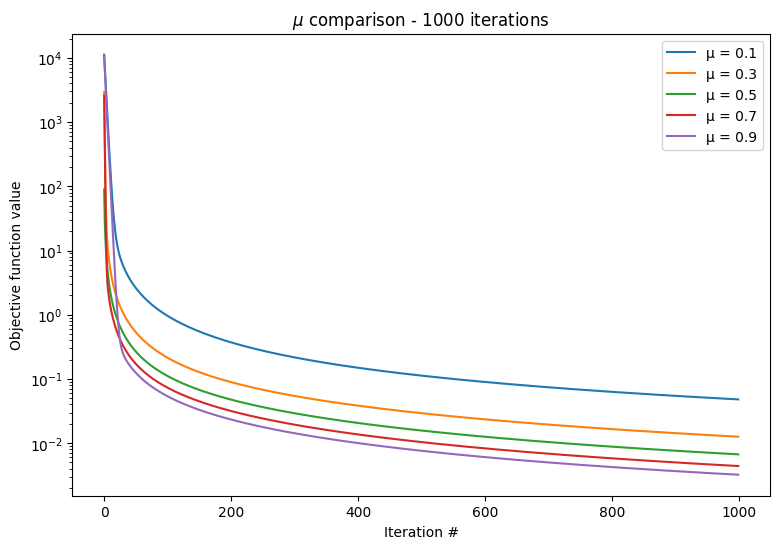

In [13]:
μ_s = [0.1, 0.3, 0.5, 0.7, 0.9]
numIters = [100, 500, 1000]
lF_s = []
for num_iter in numIters:
    fig = plt.figure(figsize=(9, 6))
    for miu in μ_s:
        start = time.time()
        mXIter, lF, k = ApplyGradientDescent(ObjF, GradF, mX0, miu, num_iter, ε)
        lF_s.append(lF)
        eval_time = time.time() - start
        print(f'μ: {miu}, numIter: {num_iter} - run time: {eval_time} sec, actual number of iterations: {k+1}')
        plt.plot(np.arange(num_iter), lF, label = f'μ = {miu}')

    plt.legend()
    plt.yscale('log')
    plt.xlabel('Iteration #')
    plt.ylabel('Objective function value')
    plt.title(f'$\mu$ comparison - {num_iter} iterations')
    plt.show(fig)


### From the result above we can clearly see that the higher numIter is the better, moreover, we can see it never reaches the $\epsilon$. <br>
### Based on these results we will use $\mu = 0.9, \text{numIter}=1000$

In [14]:
#===========================Fill This===========================#
# 1. Estimate `mXIter` using `ApplyGradientDescent()`.
# 2. Time the run time and measure the number of iterations to converge.
# 3. Optimize the parameters to get a comparable result to `mX` from above.
μ           = 0.9
numIterGD   = 1000
ε           = 10e-12

start = time.time()
mXIter, lF_GD, k = ApplyGradientDescent(ObjF, GradF, mX0, μ, numIterGD, ε)
eval_time = time.time() - start
print(f'run time: {eval_time} sec, number of iterations: {k+1}')

#===============================================================#

run time: 4.627012014389038 sec, number of iterations: 1000


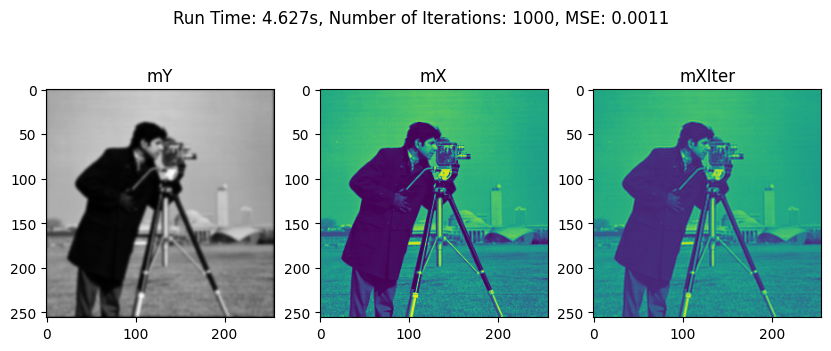

In [15]:
#===========================Fill This===========================#
# 1. Plot `mY`, `mX` and `mXIter`.
# 2. Calculate the MSE between `mX` and `mXIter`.
# 3. In the title of the plots show: The run time, the number of iterations and the MSE.
from sklearn.metrics import mean_squared_error

mse_mx_mxiter = mean_squared_error(mX, mXIter)

hF, hAs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))
hF.suptitle(f'Run Time: {round(eval_time,4)}s, Number of Iterations: {len(lF)}, MSE: {round(mse_mx_mxiter,4)}')
hAs = hAs.flat

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('mY')
hAs[1].imshow(mX)
hAs[1].set_title('mX')
hAs[2].imshow(mXIter)
hAs[2].set_title('mXIter')


plt.show()
#===============================================================#

## Acceleration Methods  

The convergence speed of the 1st derivative method is sometimes very slow (Depends on the condition number of the model).  
For small problems one might use a 2nd order methods, yet those are more sensitive and require more calculations per iteration.

[Yurii Nesterov](https://en.wikipedia.org/wiki/Yurii_Nesterov), a Russian mathematician, an internationally recognized expert in convex optimization, was a pioneer in developing some approaches to [acceleration of 1st order methods](https://en.wikipedia.org/wiki/Gradient_descent#Fast_gradient_methods).  

In this section we'll implement such method, yet based on the [_momentum_ approach](https://en.wikipedia.org/wiki/Gradient_descent#Momentum_or_heavy_ball_method).

![](https://i.imgur.com/hFQv6Sa.png)

Let's compare the update rule of both methods:

 - Vanilla Gradient Descent: $\boldsymbol{x}^{\left( k \right)} = \boldsymbol{x}^{\left( k - 1 \right)} - \mu \nabla f \left( \boldsymbol{x}^{\left( k - 1 \right)} \right)$.
 - Momentum Accelerated Gradient Descent: $\boldsymbol{x}^{\left( k \right)} = \boldsymbol{x}^{\left( k - 1 \right)} - \mu \nabla f \left( \boldsymbol{x}^{\left( k - 1 \right)} \right) + \beta \left( \boldsymbol{x}^{\left( k - 1 \right)} - \boldsymbol{x}^{\left( k - 2 \right)} \right) $.  
   Where $\beta \in \left[ 0, 1 \right)$ (Typically $\beta \in \left[ 0.9, 0.99 \right]$).

The momentum method basically incorporate more data in order to optimize the direction of descent.

### 4.5. Question

Show that $\boldsymbol{x}^{\left( k \right)}$ can be expressed by:

$$\boldsymbol{x}^{\left( k + 1 \right)} = \boldsymbol{x}^{\left( k \right)} - \mu \sum_{l = 0}^{k} \beta^{k - l} \nabla f \left( \boldsymbol{x}^{\left( l \right)} \right)$$

* <font color='brown'>(**#**)</font> Basically, the update step is a combination of all (Weighted) previous steps.

### 4.5. Solution

Prove by induction:<br>
$ x_0 $ <br>
$ x_1 = x_0 - \mu\nabla f\left(x_0\right) $ No update of momentum cause there is no history<br> 
$ x_2 = x_1 - \mu\nabla f\left(x_1\right) + \beta\left(x_1 - x_0\right) = x_1 - \mu\nabla f\left(x_1\right) + \beta\left(x_0 - \mu\nabla f\left(x_0\right) - x_0\right) = x_1 - \mu\nabla f\left(x_1\right) + \beta\left(- \mu\nabla f\left(x_0\right)\right) = x_1 - \mu \sum_{l = 0}^{1} \beta^{1 - l} \nabla f \left( x_l \right)$ <br>

Assume it works for k, show for k+1: <br>

$$ x_{k+1} = x_k - \mu\nabla f\left(x_k\right) + \beta\left(x_{k} - x_{k-1}\right) = x_k - \mu\nabla f\left(x_k\right) + \beta\left(x_{k-1} - \mu \sum_{l = 0}^{k-1} \beta^{k - 1 - l} \nabla f \left( x_l \right) - x_{k-1}\right) = x_k - \mu\nabla f\left(x_k\right) + \beta\left(- \mu \sum_{l = 0}^{k-1} \beta^{k - 1 - l} \nabla f \left( x_l \right)\right) = x_k - \mu\nabla f\left(x_k\right) + \left(- \mu \sum_{l = 0}^{k-1} \beta^{k - l} \nabla f \left( x_l \right)\right) = x_k - \mu \sum_{l = 0}^{k} \beta^{k - l} \nabla f \left( x_l \right)$$

---

### 4.6. Task

Implement the following function:

```python
#====================================================#
def ApplyGradientDescentMomentum(objF, gradF, mX0, μ, β, numIter, ε):
#====================================================#
```

In [16]:
#===========================Fill This===========================#
# 1. Implement the momentum accelerated gradient descent optimizer function.
def ApplyGradientDescentMomentum(objF: Callable, gradF: Callable, mX0: np.ndarray, μ: float, β: float, numIter: int, ε: float) -> Tuple[np.ndarray, List]:
    '''
    Apply gradient descent.
    Args:
        objF    - Objective function (Callable)
        gradF   - Objective gradient function (Callable)
        mX0     - Initial point (Array)
        μ       - Step size / Learning rate (Float)
        numIter - Maximum number of iterations (Integer)
        β       - Momentum decaying factor (Float)
        ε       - Stopping criterion value (Float)
    Output:
        mX      - The converged mX (Array).
        lF      - The value objective for each iteration (List)
    Stopping criterion:
        - Stop iterate when ||∇f(X)||_F < (numPixels * ε).
        - Stop iterate after `numIter` iterations.
    '''

    ub = mX0.shape[0] * mX0.shape[1] * ε
    mX = mX0
    lF = []
    previous_steps = gradF(mX0)
    for k in range(numIter):
        mX = mX - μ * previous_steps
        previous_steps *= β
        grad = gradF(mX)
        previous_steps += (grad)
        lF.append(objF(mX))
        if np.linalg.norm(grad, 'fro') < ub:
          return mX, lF, k
    return mX, lF, k
#===============================================================#

### 4.7. Task

Repeat the above for the accelerated method:

 - Set the the same initial `mX0` as above.
 - Set the parameters for the `ApplyGradientDescentMomentum()` function.
 - Run the function, optimize parameters to converge as fast as you can while achieving similar result to `mX`.
 - Plot `mY`, `mX`, `mXIter`, `mXMomentum`. Write the MSE between `mXIter` and `mXMomentum` to `mX`, Write the number of iterations for each and the run time.

μ: 0.1, β: 0.9 - run time: 0.5567970275878906 sec, actual number of iterations: 100, MSE = 0.001665
μ: 0.1, β: 0.91 - run time: 0.4711580276489258 sec, actual number of iterations: 100, MSE = 0.00164
μ: 0.1, β: 0.92 - run time: 0.4985079765319824 sec, actual number of iterations: 100, MSE = 0.001616
μ: 0.1, β: 0.93 - run time: 0.4783170223236084 sec, actual number of iterations: 100, MSE = 0.0016
μ: 0.1, β: 0.94 - run time: 0.5093467235565186 sec, actual number of iterations: 100, MSE = 0.001606
μ: 0.1, β: 0.95 - run time: 0.46211886405944824 sec, actual number of iterations: 100, MSE = 0.001666
μ: 0.1, β: 0.96 - run time: 0.49848008155822754 sec, actual number of iterations: 100, MSE = 0.00188
μ: 0.1, β: 0.97 - run time: 0.4494500160217285 sec, actual number of iterations: 100, MSE = 0.002592
μ: 0.1, β: 0.98 - run time: 0.5021038055419922 sec, actual number of iterations: 100, MSE = 0.005125
μ: 0.1, β: 0.99 - run time: 0.5072760581970215 sec, actual number of iterations: 100, MSE = 0.

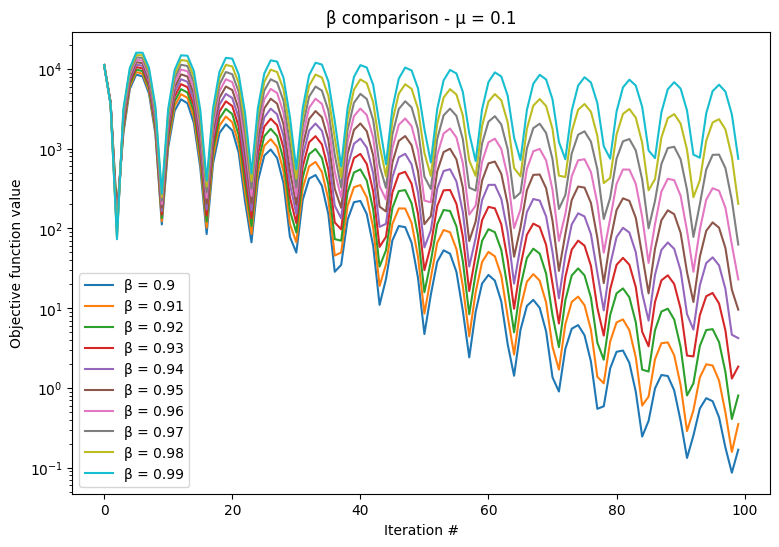

μ: 0.3, β: 0.9 - run time: 0.45873522758483887 sec, actual number of iterations: 100, MSE = 0.001381
μ: 0.3, β: 0.91 - run time: 0.4774489402770996 sec, actual number of iterations: 100, MSE = 0.001373
μ: 0.3, β: 0.92 - run time: 0.5735487937927246 sec, actual number of iterations: 100, MSE = 0.001388
μ: 0.3, β: 0.93 - run time: 0.4591388702392578 sec, actual number of iterations: 100, MSE = 0.00146
μ: 0.3, β: 0.94 - run time: 0.5634400844573975 sec, actual number of iterations: 100, MSE = 0.001649
μ: 0.3, β: 0.95 - run time: 0.5378098487854004 sec, actual number of iterations: 100, MSE = 0.002047
μ: 0.3, β: 0.96 - run time: 0.7225022315979004 sec, actual number of iterations: 100, MSE = 0.002749
μ: 0.3, β: 0.97 - run time: 0.5281679630279541 sec, actual number of iterations: 100, MSE = 0.003861
μ: 0.3, β: 0.98 - run time: 0.5242390632629395 sec, actual number of iterations: 100, MSE = 0.006151
μ: 0.3, β: 0.99 - run time: 0.4324359893798828 sec, actual number of iterations: 100, MSE = 

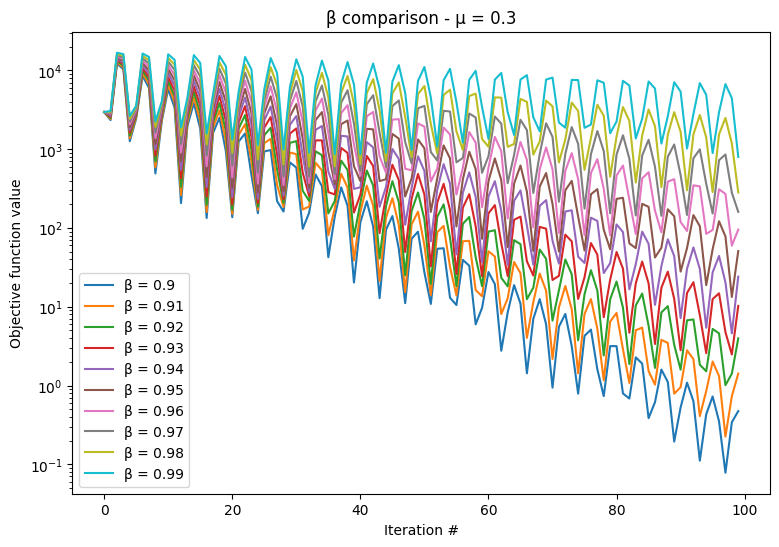

μ: 0.5, β: 0.9 - run time: 0.5867350101470947 sec, actual number of iterations: 100, MSE = 0.001264
μ: 0.5, β: 0.91 - run time: 0.6028990745544434 sec, actual number of iterations: 100, MSE = 0.001254
μ: 0.5, β: 0.92 - run time: 0.5651199817657471 sec, actual number of iterations: 100, MSE = 0.001274
μ: 0.5, β: 0.93 - run time: 1.0631370544433594 sec, actual number of iterations: 100, MSE = 0.001399
μ: 0.5, β: 0.94 - run time: 0.722445011138916 sec, actual number of iterations: 100, MSE = 0.001805
μ: 0.5, β: 0.95 - run time: 0.5381639003753662 sec, actual number of iterations: 100, MSE = 0.002843
μ: 0.5, β: 0.96 - run time: 0.5240082740783691 sec, actual number of iterations: 100, MSE = 0.004988
μ: 0.5, β: 0.97 - run time: 0.4018738269805908 sec, actual number of iterations: 100, MSE = 0.008466
μ: 0.5, β: 0.98 - run time: 0.466663122177124 sec, actual number of iterations: 100, MSE = 0.01278
μ: 0.5, β: 0.99 - run time: 0.5123441219329834 sec, actual number of iterations: 100, MSE = 0.0

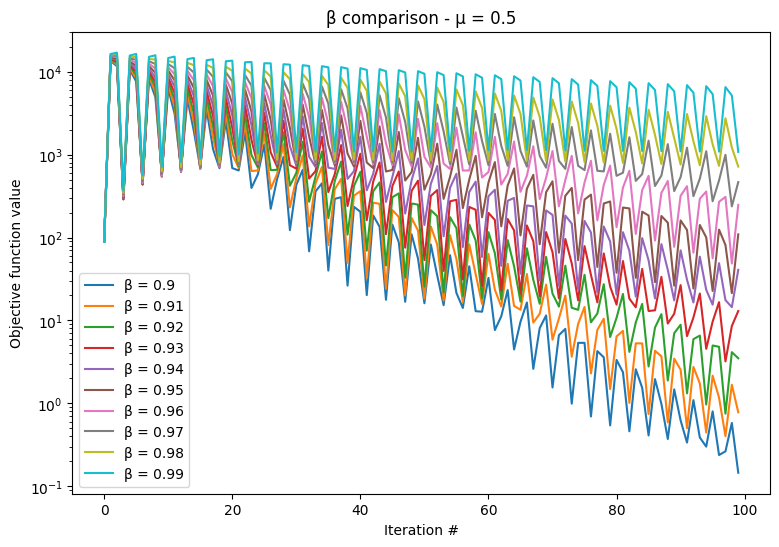

μ: 0.7, β: 0.9 - run time: 0.7042548656463623 sec, actual number of iterations: 100, MSE = 0.001198
μ: 0.7, β: 0.91 - run time: 0.7192761898040771 sec, actual number of iterations: 100, MSE = 0.001181
μ: 0.7, β: 0.92 - run time: 0.4834308624267578 sec, actual number of iterations: 100, MSE = 0.001178
μ: 0.7, β: 0.93 - run time: 0.5002870559692383 sec, actual number of iterations: 100, MSE = 0.001263
μ: 0.7, β: 0.94 - run time: 0.41139984130859375 sec, actual number of iterations: 100, MSE = 0.001704
μ: 0.7, β: 0.95 - run time: 0.5301079750061035 sec, actual number of iterations: 100, MSE = 0.003152
μ: 0.7, β: 0.96 - run time: 0.43717098236083984 sec, actual number of iterations: 100, MSE = 0.006647
μ: 0.7, β: 0.97 - run time: 0.373485803604126 sec, actual number of iterations: 100, MSE = 0.012745
μ: 0.7, β: 0.98 - run time: 0.5017521381378174 sec, actual number of iterations: 100, MSE = 0.019612
μ: 0.7, β: 0.99 - run time: 0.44469308853149414 sec, actual number of iterations: 100, MSE 

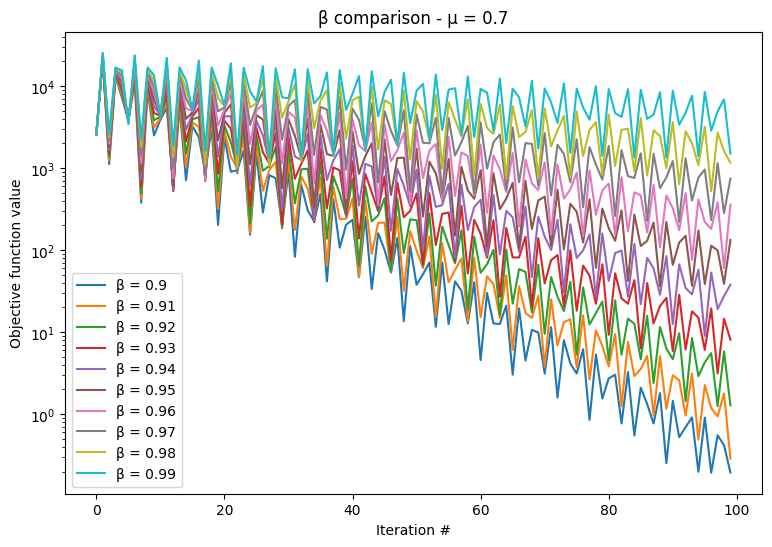

μ: 0.9, β: 0.9 - run time: 0.6999759674072266 sec, actual number of iterations: 100, MSE = 0.001151
μ: 0.9, β: 0.91 - run time: 1.0159530639648438 sec, actual number of iterations: 100, MSE = 0.001145
μ: 0.9, β: 0.92 - run time: 0.5488770008087158 sec, actual number of iterations: 100, MSE = 0.00119
μ: 0.9, β: 0.93 - run time: 0.5994188785552979 sec, actual number of iterations: 100, MSE = 0.00138
μ: 0.9, β: 0.94 - run time: 0.5121963024139404 sec, actual number of iterations: 100, MSE = 0.001791
μ: 0.9, β: 0.95 - run time: 0.5042641162872314 sec, actual number of iterations: 100, MSE = 0.002248
μ: 0.9, β: 0.96 - run time: 0.5305109024047852 sec, actual number of iterations: 100, MSE = 0.00251
μ: 0.9, β: 0.97 - run time: 0.4493257999420166 sec, actual number of iterations: 100, MSE = 0.005731
μ: 0.9, β: 0.98 - run time: 0.4142920970916748 sec, actual number of iterations: 100, MSE = 0.030886
μ: 0.9, β: 0.99 - run time: 0.5249178409576416 sec, actual number of iterations: 100, MSE = 0.1

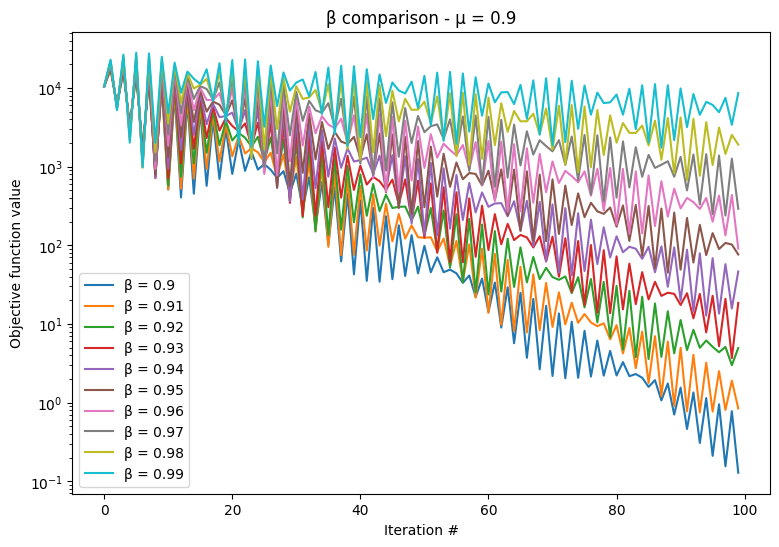

In [17]:
μ_s = [0.1, 0.3, 0.5, 0.7, 0.9]
β_s = np.arange(0.9, 1, 0.01)
numIter = 100
lF_s = []
for miu in μ_s:
    fig = plt.figure(figsize=(9, 6))
    for β in β_s:
        start = time.time()
        mXMomentum, lF, k = ApplyGradientDescentMomentum(ObjF, GradF, mX0, miu, β, numIter, ε)
        lF_s.append(lF)
        eval_time = time.time() - start
        print(f'μ: {miu}, β: {round(β, 2)} - run time: {eval_time} sec, actual number of iterations: {k+1}, MSE = {round(mean_squared_error(mX, mXMomentum), 6)}')
        plt.plot(np.arange(numIter), lF, label = f'β = {round(β, 2)}')

    plt.legend()
    plt.yscale('log')
    plt.xlabel('Iteration #')
    plt.ylabel('Objective function value')
    plt.title(f'β comparison - μ = {miu}')
    plt.show(fig)


### From the result above we can see that using $\beta > 0.95$ harm the results, while $\beta = 0.9$ produces best results. <br>


μ: 0.1, numIter: 100 - run time: 0.6196579933166504 sec, actual number of iterations: 100, MSE = 0.00164
μ: 0.3, numIter: 100 - run time: 0.5545978546142578 sec, actual number of iterations: 100, MSE = 0.001373
μ: 0.5, numIter: 100 - run time: 0.4536020755767822 sec, actual number of iterations: 100, MSE = 0.001254
μ: 0.7, numIter: 100 - run time: 0.45831298828125 sec, actual number of iterations: 100, MSE = 0.001181
μ: 0.9, numIter: 100 - run time: 0.5865659713745117 sec, actual number of iterations: 100, MSE = 0.001145


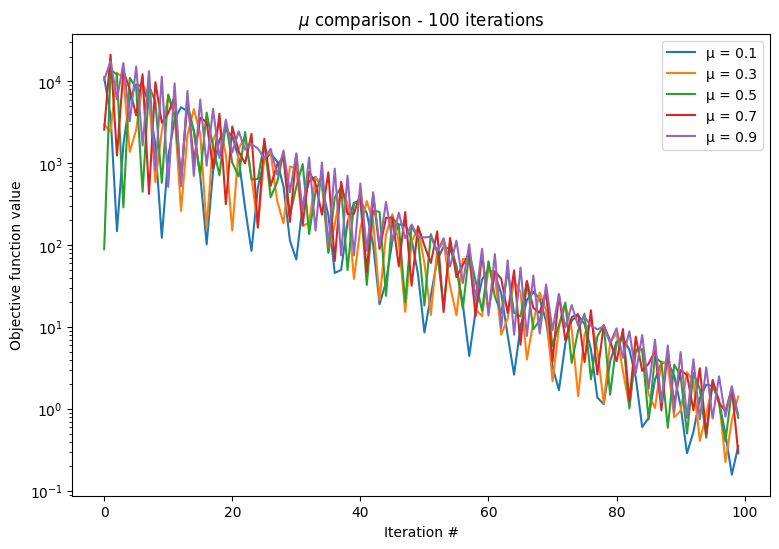

μ: 0.1, numIter: 500 - run time: 2.5029640197753906 sec, actual number of iterations: 500, MSE = 0.001234
μ: 0.3, numIter: 500 - run time: 2.367097854614258 sec, actual number of iterations: 500, MSE = 0.001042
μ: 0.5, numIter: 500 - run time: 2.6838202476501465 sec, actual number of iterations: 500, MSE = 0.000966
μ: 0.7, numIter: 500 - run time: 2.8717329502105713 sec, actual number of iterations: 500, MSE = 0.00092
μ: 0.9, numIter: 500 - run time: 2.576202154159546 sec, actual number of iterations: 500, MSE = 0.000888


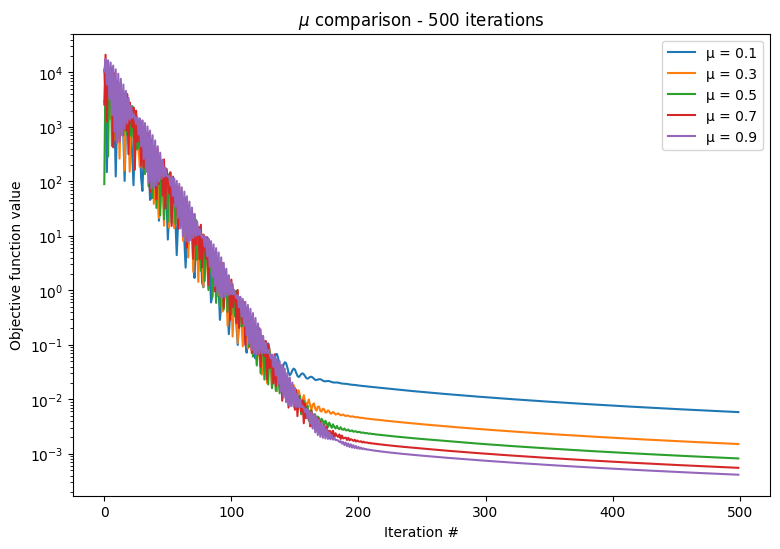

In [18]:
μ_s = [0.1, 0.3, 0.5, 0.7, 0.9]
numIters = [100, 500]
β = 0.91
lF_s = []
for num_iter in numIters:
    fig = plt.figure(figsize=(9, 6))
    for miu in μ_s:
        start = time.time()
        mXMomentum, lF, k = ApplyGradientDescentMomentum(ObjF, GradF, mX0, miu, β, num_iter, ε)
        lF_s.append(lF)
        eval_time = time.time() - start
        print(f'μ: {miu}, numIter: {num_iter} - run time: {eval_time} sec, actual number of iterations: {k+1}, MSE = {round(mean_squared_error(mX, mXMomentum), 6)}')
        plt.plot(np.arange(num_iter), lF, label = f'μ = {miu}')

    plt.legend()
    plt.yscale('log')
    plt.xlabel('Iteration #')
    plt.ylabel('Objective function value')
    plt.title(f'$\mu$ comparison - {num_iter} iterations')
    plt.show(fig)


### From the result above we can see that using more than 500 iterations is unnecessary, and even 300 is enough and has no major contribution. <br>
### Moreover, we can determain than $\mu = 0.9$ is the best, similarly to regular GD

In [19]:
#===========================Fill This===========================#
# 1. Estimate `mXIter` using `ApplyGradientDescentMomentum()`.
# 2. Time the run time and measure the number of iterations to converge.
# 3. Optimize the parameters to get a comparable result to `mX` from above.

mX0             = np.zeros(mX.shape)
μ               = 0.9
numIterMomentum = 300
ε               = 10e-12
β               = 0.9

start = time.time()
mXMomentum, lF_momentum, k = ApplyGradientDescentMomentum(ObjF, GradF, mX0, μ, β, numIterMomentum, ε)
eval_time = time.time() - start
print(f'run time: {eval_time} sec, number of iterations: {k+1}')

#===============================================================#

run time: 1.4085698127746582 sec, number of iterations: 300


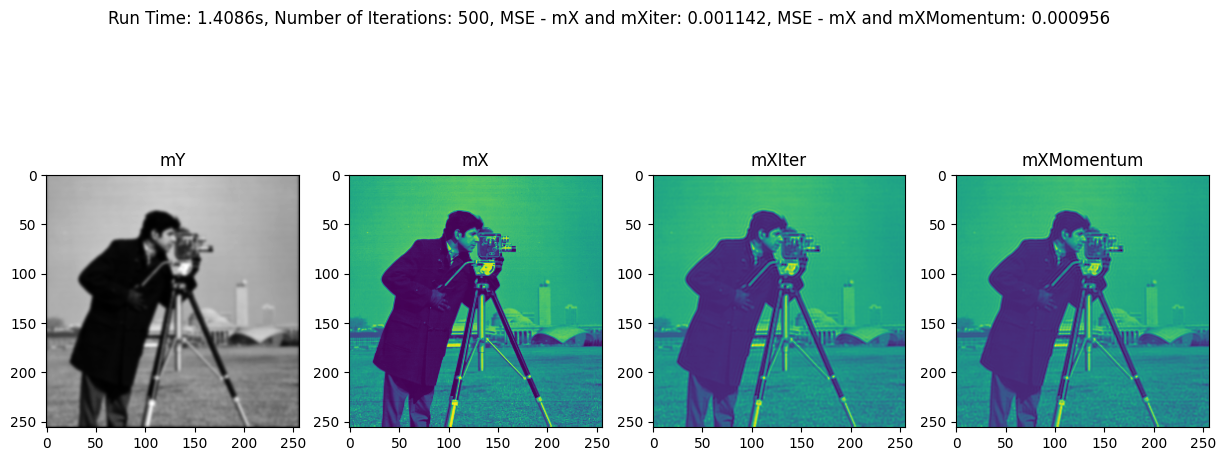

In [20]:
#===========================Fill This===========================#
# 1. Plot `mY`, `mX`, `mXIter` and `mXMomentum`.
# 2. Calculate the MSE between `mX` <-> `mXIter`, `mX` <-> `mXMomentum`.
# 3. In the title of the plots show: The run time, the number of iterations and the MSE (For `mXIter` and `mXMomentum`).

mse_mx_mxmomentum = mean_squared_error(mX, mXMomentum)

hF, hAs = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 6))
hF.suptitle(f'Run Time: {round(eval_time,4)}s, Number of Iterations: {len(lF)}, MSE - mX and mXiter: {round(mse_mx_mxiter, 6)}, MSE - mX and mXMomentum: {round(mse_mx_mxmomentum, 6)}')
hAs = hAs.flat

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('mY')
hAs[1].imshow(mX)
hAs[1].set_title('mX')
hAs[2].imshow(mXIter)
hAs[2].set_title('mXIter')
hAs[3].imshow(mXMomentum)
hAs[3].set_title('mXMomentum')


plt.show()
#===============================================================#

### 4.8. Task (Bonus 3%)

Plot the objective value function as a function of the iteration for both iterative methods.  

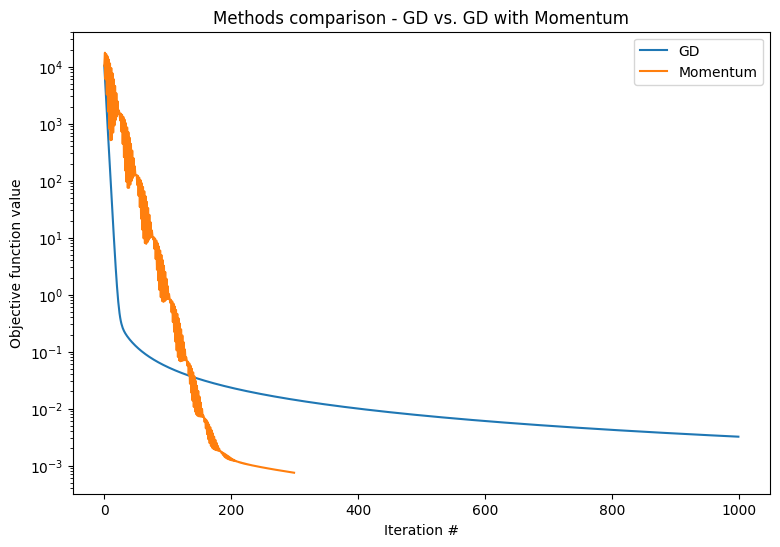

In [21]:
#===========================Fill This===========================#
# 1. Plot the objective value function as a function of the iteration index for both iterative methods.
fig = plt.figure(figsize=(9, 6))
plt.plot(np.arange(numIterGD), lF_GD, label = f'GD')
plt.plot(np.arange(numIterMomentum), lF_momentum, label = f'Momentum')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration #')
plt.ylabel('Objective function value')
plt.title(f'Methods comparison - GD vs. GD with Momentum')
plt.show(fig)

#===============================================================#